<h1 style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MILK Quality Control</h1>

In [12]:
#import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</h1>

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk. 

This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color. Generally, the Grade or Quality of the milk depends on these parameters.

These parameters play a vital role in the predictive analysis of the milk. Usage The target variable is nothing but the Grade of the milk. It can be Target Low (Bad) Medium (Moderate) High (Good) If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0. 

Temperature and ph are given their actual values in the dataset. We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk. 

Inspiration To leverage the benefits of machine learning in the dairy industry.

In [13]:
data = pd.read_csv('milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [14]:
print("\n Data set ini memiliki jumlah baris dan kolom (baris, kolom) yaitu:", data.shape)


 Data set ini memiliki jumlah baris dan kolom (baris, kolom) yaitu: (1059, 8)


<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis</h1>

In [15]:
print(f"Summary of Milk Dataset :\n")
data.describe().T

Summary of Milk Dataset :



,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [16]:
print(f"Informations of Milk Dataset :\n")
print(data.info())


Informations of Milk Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [17]:
print(data["Colour"].shape)
print(f'\n There are {len(data["Colour"].unique())} Colour enlisted here.\n')
data["Colour"].unique()

(1059,)

 There are 9 Colour enlisted here.



array([254, 253, 246, 255, 250, 247, 245, 240, 248], dtype=int64)

In [18]:
print(data["Grade"].shape)
print(f'\n There are {len(data["Grade"].unique())} Grade enlisted here.\n')
data["Grade"].unique()

(1059,)

 There are 3 Grade enlisted here.



array(['high', 'low', 'medium'], dtype=object)

In [19]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

No data is Null/NaN 

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Visualization</h1>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


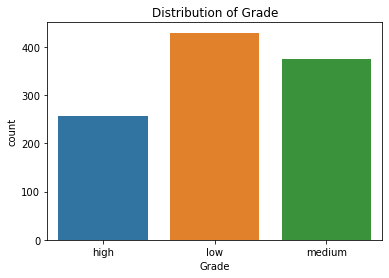

In [20]:
#Distribusi Grade
sns.countplot(data['Grade']).set_title('Distribution of Grade')
plt.show()

<AxesSubplot:xlabel='Colour', ylabel='Grade'>

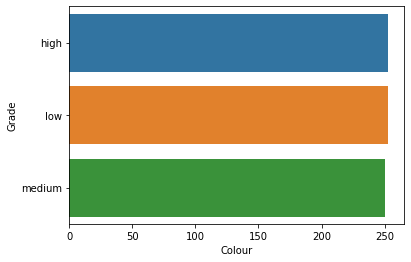

In [21]:
#clasifikasi dengan bar plot
sns.barplot(x="Colour", y="Grade", data=data, ci=None)

<AxesSubplot:xlabel='pH', ylabel='Grade'>

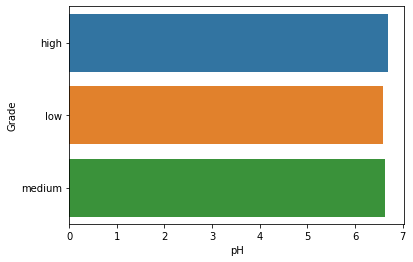

In [22]:
#clasifikasi dengan bar plot
sns.barplot(x="pH", y="Grade", data=data, ci=None)

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</h1>

In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data["Grade"])
data["Grade"]=le.transform(data["Grade"])
Grade_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(Grade_labels)

{'high': 0, 'low': 1, 'medium': 2}


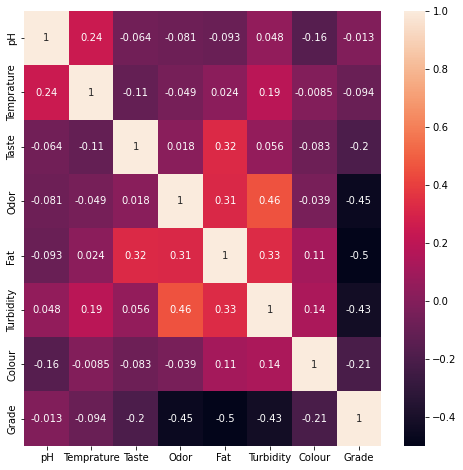

In [24]:
#melihat ketergantungan suatu fitur terhadap kelas
#dengan menggunakan heatmap
plt.figure(figsize=(8,8))
cor = data.corr(method="pearson")
sns.heatmap(cor, annot=True)
plt.show()

In [25]:
X = data.iloc[0:,:7]
X[0:5]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [26]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.02153136, -0.91410734,  0.91050291, -0.87296233,  0.69960809,
        -0.98221664,  0.5016002 ],
       [-0.02153136, -0.81503461, -1.09829413,  1.1455248 , -1.4293717 ,
         1.01810533,  0.26933321],
       [ 1.33656414,  2.55343832,  0.91050291,  1.1455248 ,  0.69960809,
         1.01810533, -1.35653574],
       [ 2.05135125, -1.01318008,  0.91050291,  1.1455248 , -1.4293717 ,
         1.01810533,  0.73386719],
       [-0.02153136, -0.71596188, -1.09829413, -0.87296233, -1.4293717 ,
        -0.98221664,  0.73386719]])

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Modeling</h1>

In [27]:
y = data["Grade"]
y[0:5]

0    0
1    0
2    1
3    1
4    2
Name: Grade, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, train_size = 0.8)
print(X_train.shape, X_test.shape)
print(X2_train.shape, X2_test.shape)

(741, 7) (318, 7)
(847, 7) (212, 7)


In [29]:
from sklearn.tree import DecisionTreeClassifier

gradeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=2)
gradeTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

In [30]:
grade2Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=2)
grade2Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

In [31]:
gradeTree.fit(X_train, y_train)
gradeTree.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

In [32]:
y_pred = gradeTree.predict(X_test)
y2_pred = gradeTree.predict(X2_test)

In [33]:
print (y_pred [0:5])
print (y_test [0:5])

[1 2 1 0 1]
823    1
861    2
316    1
228    2
430    1
Name: Grade, dtype: int32


In [34]:
print (y2_pred [0:5])
print (y2_test [0:5])

[2 2 0 0 2]
249    2
612    2
911    2
875    0
514    2
Name: Grade, dtype: int32


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        80
           1       1.00      1.00      1.00       135
           2       1.00      0.64      0.78       103

    accuracy                           0.88       318
   macro avg       0.89      0.88      0.86       318
weighted avg       0.92      0.88      0.88       318

[[ 80   0   0]
 [  0 135   0]
 [ 37   0  66]]


In [36]:
print(classification_report(y2_test,y2_pred))
print(confusion_matrix(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        48
           1       1.00      0.99      0.99        77
           2       1.00      0.61      0.76        87

    accuracy                           0.83       212
   macro avg       0.86      0.87      0.83       212
weighted avg       0.90      0.83      0.84       212

[[48  0  0]
 [ 1 76  0]
 [34  0 53]]


In [37]:
# Compute confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion matrix untuk train_size = 0.7 adalah')
print(confusion_matrix(y_test, y_pred, labels=[0,1,2]))
print("\n")
print('Confusion matrix untuk train_size = 0.8 adalah')
print(confusion_matrix(y2_test, y2_pred, labels=[0,1,2]))

Confusion matrix untuk train_size = 0.7 adalah
[[ 80   0   0]
 [  0 135   0]
 [ 37   0  66]]


Confusion matrix untuk train_size = 0.8 adalah
[[48  0  0]
 [ 1 76  0]
 [34  0 53]]


Confusion matrix, without normalization
[[ 80   0   0]
 [  0 135   0]
 [ 37   0  66]]


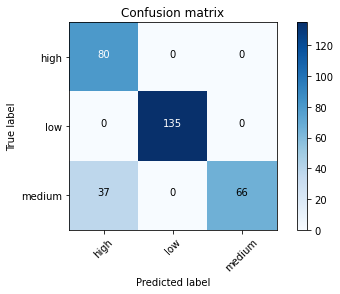

In [38]:
# Compute confusion matrix train_size=0.7
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high','low', 'medium'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[48  0  0]
 [ 1 76  0]
 [34  0 53]]


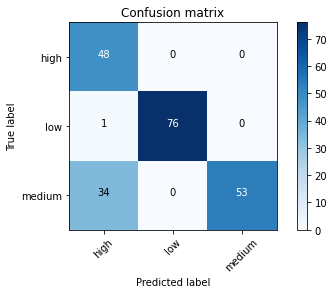

In [39]:
# Compute confusion matrix train_size=0.8
cnf_matrix = confusion_matrix(y2_test, y2_pred, labels=[0,1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high','low', 'medium'],normalize= False,  title='Confusion matrix')

In [40]:
#memmghitung akurasi dari modelm dengan nilai masing-masing trainsize 

from sklearn import metrics

print("DecisionTrees's Accuracy for train_size=0.7: ", metrics.accuracy_score(y_test, y_pred))
print("DecisionTrees's Accuracy for train_size=0.8: ", metrics.accuracy_score(y2_test, y2_pred))

DecisionTrees's Accuracy for train_size=0.7:  0.8836477987421384
DecisionTrees's Accuracy for train_size=0.8:  0.8349056603773585


In [41]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [42]:
y_predLR = LR.predict(X_test)
y_predLR

array([1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0,
       1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2,
       0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1,
       2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2,

In [43]:
y_predLR_prob = LR.predict_proba(X_test)
y_predLR_prob

array([[0.38, 0.53, 0.09],
       [0.16, 0.3 , 0.54],
       [0.37, 0.52, 0.11],
       [0.29, 0.17, 0.54],
       [0.41, 0.49, 0.1 ],
       [0.22, 0.72, 0.06],
       [0.4 , 0.42, 0.18],
       [0.22, 0.41, 0.37],
       [0.25, 0.2 , 0.55],
       [0.38, 0.53, 0.09],
       [0.13, 0.38, 0.49],
       [0.33, 0.43, 0.24],
       [0.39, 0.33, 0.27],
       [0.25, 0.2 , 0.55],
       [0.25, 0.2 , 0.55],
       [0.27, 0.51, 0.22],
       [0.06, 0.49, 0.45],
       [0.27, 0.51, 0.22],
       [0.16, 0.16, 0.68],
       [0.4 , 0.42, 0.18],
       [0.42, 0.44, 0.14],
       [0.32, 0.27, 0.41],
       [0.37, 0.52, 0.11],
       [0.22, 0.72, 0.06],
       [0.32, 0.26, 0.41],
       [0.22, 0.28, 0.49],
       [0.32, 0.25, 0.42],
       [0.32, 0.27, 0.41],
       [0.29, 0.17, 0.54],
       [0.28, 0.63, 0.1 ],
       [0.27, 0.51, 0.22],
       [0.12, 0.13, 0.74],
       [0.27, 0.51, 0.22],
       [0.12, 0.35, 0.53],
       [0.43, 0.38, 0.19],
       [0.42, 0.44, 0.14],
       [0.14, 0.2 , 0.65],
 

In [44]:
#menghitung akurasi
from sklearn import metrics

akurasi = metrics.accuracy_score(y_test, y_predLR)
print(akurasi)

0.710691823899371


Confusion matrix, without normalization
[[40 24 16]
 [28 91 16]
 [ 5  3 95]]


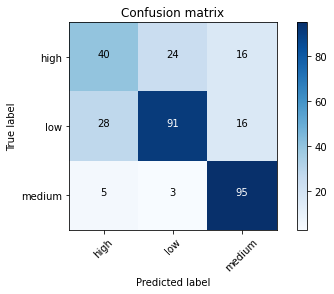

In [45]:
# Compute confusion matrix train_size=0.8
cnf_matrix = confusion_matrix(y_test, y_predLR, labels=[0,1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high','low', 'medium'],normalize= False,  title='Confusion matrix')

Hasilnya didapatkan bahwa model Decision Tree lebih baik daripada model Logistic Regression. 

In [46]:
#Prediksi inputan baru
pH = float(input("Masukkan nilai pH = "))
suhu = int(input("Masukkan nilai Suhu ="))
rasa = int(input("Memiliki rasa atau Tidak? Yes=1, No=0 = "))
bau = int(input("Berbau atau Tidak? Yes=1, No=0 = "))
lemak = int(input("Memiliki kandungan lemak atau Tidak? Yes=1, No=0 = "))
kekeruhan = int(input("Keruh atau Tidak? Yes=1, No=0 = "))
warna = int(input("Masukkan kode warna susu dalam RGB (0-255)? = "))

Masukkan nilai pH = 6.1
Masukkan nilai Suhu =40
Memiliki rasa atau Tidak? Yes=1, No=0 = 1
Berbau atau Tidak? Yes=1, No=0 = 0
Memiliki kandungan lemak atau Tidak? Yes=1, No=0 = 1
Keruh atau Tidak? Yes=1, No=0 = 1
Masukkan kode warna susu dalam RGB (0-255)? = 250


In [47]:
databaru = [[pH,suhu,rasa,bau,lemak,kekeruhan,warna]]
predBaru = gradeTree.predict(databaru)
predBaru

array([1])

Dimana : 0 = Kualitas susu High (tinggi),
         1 = Kualitas susu Low (rendah),
         2 = Kualitas susu Medium (sedang)

In [48]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [49]:
data['Grade'] = data['Grade'].astype(str)
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [52]:
dot_data = StringIO()
filename = "milktree.png"
featureNames = data.columns[0:7]
out=tree.export_graphviz(gradeTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: can only concatenate str (not "numpy.int32") to str

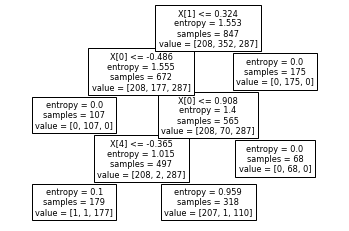

In [51]:
from sklearn import tree

tree.plot_tree(gradeTree);